# Predicting Diabetes
## import Libraries

In [1]:
import pandas as pd #pandas is dataframe library
import matplotlib.pyplot as plt #plotting data
import numpy as np #N-dim object support
#plots inline rather than other window
%matplotlib inline

## Load and Review Data

In [9]:
df = pd.read_csv("file:///E:/machine%20learning/pluralsight/MachineLearningWithPython-master/Notebooks/data/pima-data.csv")

In [10]:
df.shape

(768, 10)

In [11]:
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [12]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [13]:
df.isnull().values.any()

False

In [17]:
def plot_corr(df,size = 11):
    corr = df.corr() #data frame correlation factor
    fig,ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

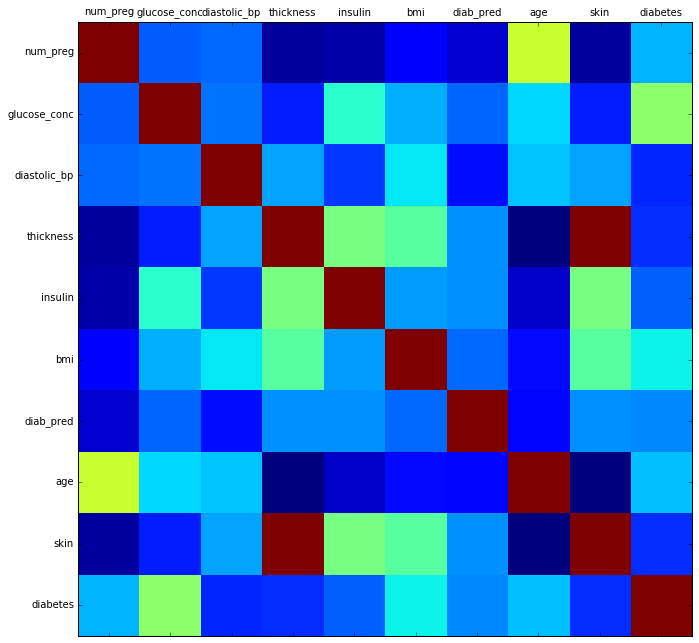

In [18]:
plot_corr(df)

In [19]:
df.corr()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [21]:
del df['skin']

In [22]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


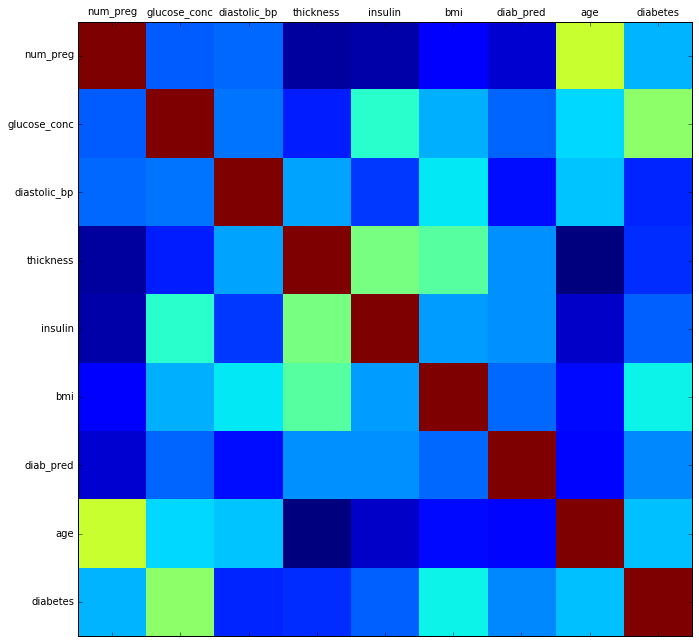

In [23]:
plot_corr(df)

# check  datatypes

In [24]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [25]:
diabetes_map = {True:1,False:0}

In [26]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [27]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("number of true cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false))*100))
print("number of false cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))      
      

number of true cases: 268 (34.90%)
number of false cases: 500 (65.10%)


### train data : 70%
### test data : 30%

In [104]:
from sklearn.cross_validation import train_test_split
feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_names = ['diabetes']
X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state = 42)  
#test_size = 30%


In [47]:
len(df.index)


768

In [105]:
X_test

array([[  6.00000000e+00,   9.80000000e+01,   5.80000000e+01, ...,
          3.40000000e+01,   4.30000000e-01,   4.30000000e+01],
       [  2.00000000e+00,   1.12000000e+02,   7.50000000e+01, ...,
          3.57000000e+01,   1.48000000e-01,   2.10000000e+01],
       [  2.00000000e+00,   1.08000000e+02,   6.40000000e+01, ...,
          3.08000000e+01,   1.58000000e-01,   2.10000000e+01],
       ..., 
       [  0.00000000e+00,   1.27000000e+02,   8.00000000e+01, ...,
          3.63000000e+01,   8.04000000e-01,   2.30000000e+01],
       [  6.00000000e+00,   1.05000000e+02,   7.00000000e+01, ...,
          3.08000000e+01,   1.22000000e-01,   3.70000000e+01],
       [  5.00000000e+00,   7.70000000e+01,   8.20000000e+01, ...,
          3.58000000e+01,   1.56000000e-01,   3.50000000e+01]])

In [106]:
print("training set :{0:0.2f}% ".format((len(X_train)/len(df.index))*100))
print("test  set :{0:0.2f}% ".format((len(X_test)/len(df.index))*100),)

training set :69.92% 
test  set :30.08% 


#### verifying predicted value is splitted perfectly

In [107]:
print("original data trues  are: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes']== 1]),(len(df.loc[df['diabetes']== 1])/len(df.index))*100))
print("original data falses are: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes']== 0]),(len(df.loc[df['diabetes']== 0])/len(df.index))*100))
print("training data trues  are: {0} ({1:0.2f}%)".format(len(y_train[y_train[:]== 1]),(len(y_train[y_train[:]== 1])/len(y_train))*100))
print("training data falses  are: {0} ({1:0.2f}%)".format(len(y_train[y_train[:]== 0]),(len(y_train[y_train[:]== 0])/len(y_train))*100))
print("testing data trues  are: {0} ({1:0.2f}%)".format(len(y_test[y_test[:]== 1]),(len(y_test[y_test[:]== 1])/len(y_test))*100))
print("testing data falses  are: {0} ({1:0.2f}%)".format(len(y_test[y_test[:]== 0]),(len(y_test[y_test[:]== 0])/len(y_test))*100))

original data trues  are: 268 (34.90%)
original data falses are: 500 (65.10%)
training data trues  are: 188 (35.01%)
training data falses  are: 349 (64.99%)
testing data trues  are: 80 (34.63%)
testing data falses  are: 151 (65.37%)


## post split data preparation

In [80]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
print("number of zeros with zero num_preg: {0}".format(len(df.loc[df['num_preg']==0])))
print("number of zeros with zero glucose_conc: {0}".format(len(df.loc[df['glucose_conc']==0])))
print("number of zeros with zero diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp']==0])))
print("number of zeros with zero thickness: {0}".format(len(df.loc[df['thickness']==0])))
print("number of zeros with zero insulin: {0}".format(len(df.loc[df['insulin']==0])))
print("number of zeros with zero bmi: {0}".format(len(df.loc[df['bmi']==0])))
print("number of zeros with zero diab_pred: {0}".format(len(df.loc[df['diab_pred']==0])))
print("number of zeros with zero age: {0}".format(len(df.loc[df['age']==0])))


number of zeros with zero num_preg: 111
number of zeros with zero glucose_conc: 5
number of zeros with zero diastolic_bp: 35
number of zeros with zero thickness: 227
number of zeros with zero insulin: 374
number of zeros with zero bmi: 11
number of zeros with zero diab_pred: 0
number of zeros with zero age: 0


###### we found there are nul values in the data so we need to ignore or impute the missing values. we cannot ignore if it is 50% of data. so we need to impute it with mean or median using scikit-learn imputer class 

## impute mean

In [108]:
from sklearn.preprocessing import Imputer
#imputing zero values with mean
fill_0 = Imputer(missing_values = 0,strategy = "mean",axis = 0)
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [109]:
X_train

array([[   1.        ,   95.        ,   60.        , ...,   23.9       ,
           0.26      ,   22.        ],
       [   5.        ,  105.        ,   72.        , ...,   36.9       ,
           0.159     ,   28.        ],
       [   4.34056399,  135.        ,   68.        , ...,   42.3       ,
           0.365     ,   24.        ],
       ..., 
       [  10.        ,  101.        ,   86.        , ...,   45.6       ,
           1.136     ,   38.        ],
       [   4.34056399,  141.        ,   72.24131274, ...,   42.4       ,
           0.205     ,   29.        ],
       [   4.34056399,  125.        ,   96.        , ...,   22.5       ,
           0.262     ,   21.        ]])

## training with 1. NaiveBayes algorithm

In [110]:
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()
nb_model.fit(X_train,y_train.ravel())

GaussianNB(priors=None)

 ## caluclating perfomance of algorithm

#### first we need to calculate accuracy over training data and we need to calculate the accuracy over test data


#### for caluclating accuracy we need to use metics library from sk learn

### train data perfomance 

In [111]:
nb_predict_train = nb_model.predict(X_train)
from sklearn import metrics
#caluclate accuracy
print("Accuracy score")
print("accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))

Accuracy score
accuracy: 0.7542


## performing in test data

In [112]:
nb_predict_test = nb_model.predict(X_test)
from sklearn import metrics
print("Accuracy score")
print("accuarcy is:{0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy score
accuarcy is:0.7359


In [113]:
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test,labels=[1,0])))
print("")
print("classification Report")
print(metrics.classification_report(y_test,nb_predict_test,labels = [1,0]))

confusion matrix
[[ 52  28]
 [ 33 118]]

classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



## Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)#create random forest object
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [116]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy:{0:0.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))


Accuracy:0.9870


In [117]:
rf_predict_test = rf_model.predict(X_test)
from sklearn import metrics
print("Accuracy score")
print("accuarcy is:{0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))

Accuracy score
accuarcy is:0.7100


In [118]:
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test,rf_predict_test,labels=[1,0])))
print("")
print("classification Report")
print(metrics.classification_report(y_test,rf_predict_test,labels = [1,0]))

confusion matrix
[[ 43  37]
 [ 30 121]]

classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



## logistic regression

In [138]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7,random_state = 42)
lr_model.fit(X_train,y_train.ravel())
lr_model_predict=lr_model.predict(X_test)
from sklearn import metrics
print("Accuracy score")
print("accuarcy is:{0:.4f}".format(metrics.accuracy_score(y_test,lr_model_predict)))
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test,lr_model_predict,labels=[1,0])))
print("")
print("classification Report")
print(metrics.classification_report(y_test,lr_model_predict,labels = [1,0]))


Accuracy score
accuarcy is:0.7446
confusion matrix
[[ 44  36]
 [ 23 128]]

classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



###### setting up regularization parameter

first max value 0f 0.550 occured at 0.100


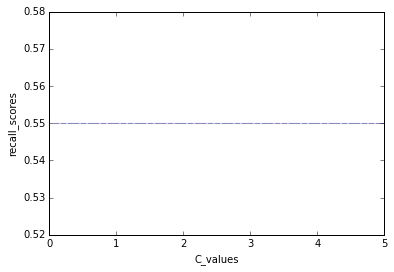

In [139]:
C_start = 0.1
C_end = 5
C_inc = 0.1
C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0
while(C_val<C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C= C_val,random_state = 42)
    lr_model.fit(X_train,y_train.ravel())
    lr_predict_loop_test = lr_model.predict(X_test)
    recall_score_loop = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score_loop)
    if(recall_score_loop>best_recall_score):
        best_recall_score = recall_score_loop
        best_lr_predict_test = lr_predict_loop_test
        
    C_val=C_val+C_inc
best_score_c_val = C_values[recall_scores.index(best_recall_score)]
print("first max value 0f {0:0.3f} occured at {1:0.3f}".format(best_recall_score,best_score_c_val))
%matplotlib inline
plt.plot(C_values,recall_scores,"_")
plt.xlabel("C_values")
plt.ylabel("recall_scores")

In [141]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=best_score_c_val,class_weight ='balanced',random_state = 42)
lr_model.fit(X_train,y_train.ravel())
lr_model_predict=lr_model.predict(X_test)
from sklearn import metrics
print("Accuracy score")
print("accuarcy is:{0:.4f}".format(metrics.accuracy_score(y_test,lr_model_predict)))
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test,lr_model_predict,labels=[1,0])))
print("")
print("classification Report")
print(metrics.classification_report(y_test,lr_model_predict,labels = [1,0]))

Accuracy score
accuarcy is:0.7013
confusion matrix
[[ 57  23]
 [ 46 105]]

classification Report
             precision    recall  f1-score   support

          1       0.55      0.71      0.62        80
          0       0.82      0.70      0.75       151

avg / total       0.73      0.70      0.71       231



### using cross validation along with algorithm


In [148]:
from sklearn.linear_model import LogisticRegressionCV
lr_model_cv = LogisticRegressionCV(n_jobs=-1,random_state = 42,Cs = 3,cv = 10,refit = True, class_weight = 'balanced')
lr_model_cv.fit(X_train,y_train.ravel())


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### prediction on test data

In [149]:
lr_model_cv_predict=lr_model_cv.predict(X_test)
from sklearn import metrics
print("Accuracy score")
print("accuarcy is:{0:.4f}".format(metrics.accuracy_score(y_test,lr_model_cv_predict)))
print("confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test,lr_model_cv_predict,labels=[1,0])))
print("")
print("classification Report")
print(metrics.classification_report(y_test,lr_model_cv_predict,labels = [1,0]))

Accuracy score
accuarcy is:0.6926
confusion matrix
[[ 52  28]
 [ 43 108]]

classification Report
             precision    recall  f1-score   support

          1       0.55      0.65      0.59        80
          0       0.79      0.72      0.75       151

avg / total       0.71      0.69      0.70       231



##### even using cross validation thr recall score is less than 70% so we need to prefer normallogistic regression with adjusted hyper parameter for better results. 

# good bye
##### i will be doing my next project on titanic survival, hope you learn from this.if any best algorithm please inform me.Thank you